In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from numpy import random
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:

try:

  from google.colab import files
  uploaded = files.upload()

except:

  pass

Saving clean_kaggle_data_2021.csv to clean_kaggle_data_2021.csv


In [ ]:
df = pd.read_csv("clean_kaggle_data_2021.csv")

In [ ]:
df.head()


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"


In [ ]:
df.shape

(15392, 371)

# **Part 1**
# **Data Cleaning**

In [ ]:
df.isnull().sum(axis=0)
#Q8,Q11,''Q13,''Q15,''Q26,Q41'Q25_Encoded,''Q25_buckets          
#Q33,Q35,Q28 drop

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_10                          14089
Q38_B_Part_11                          12880
Q38_B_OTHER                            15177
Q25_Encoded                                1
Q25_buckets                                1
Length: 371, dtype: int64

In [ ]:
#We replace the missing values in these columns with the mode 
df['Q8'].value_counts()
df['Q8'].fillna(df['Q8'].mode()[0], inplace=True)
df['Q8'].isna().sum()

0

In [ ]:
df['Q11'].value_counts()
df['Q11'].fillna(df['Q11'].mode()[0], inplace=True)
df.Q11.isna().sum()

0

In [ ]:
df['Q13'].value_counts()
df['Q13'].fillna(df['Q13'].mode()[0], inplace=True)
df.Q13.isna().sum()

0

In [ ]:
df['Q15'].value_counts()
df['Q15'].fillna(df['Q15'].mode()[0], inplace=True)
df.Q15.isna().sum()

0

In [ ]:
df['Q26'].value_counts()
df['Q26'].fillna(df['Q26'].mode()[0], inplace=True)
df.Q26.isna().sum()

0

In [ ]:
df.drop(['Q28'],axis = 1, inplace= True)
'''df['Q28'].value_counts()
df['Q28'].fillna(df['Q28'].mode()[0], inplace=True)
df.Q28.isna().sum()'''

"df['Q28'].value_counts()\ndf['Q28'].fillna(df['Q28'].mode()[0], inplace=True)\ndf.Q28.isna().sum()"

In [ ]:
df.drop(['Q33'],axis = 1, inplace= True)
'''df['Q33'].value_counts()
df['Q33'].fillna(df['Q33'].mode()[0], inplace=True)
df.Q33.isna().sum()'''

"df['Q33'].value_counts()\ndf['Q33'].fillna(df['Q33'].mode()[0], inplace=True)\ndf.Q33.isna().sum()"

In [ ]:
df.drop(['Q35'],axis = 1, inplace= True)
'''df['Q35'].value_counts()
df['Q35'].fillna(df['Q35'].mode()[0], inplace=True)
df.Q35.isna().sum()'''

"df['Q35'].value_counts()\ndf['Q35'].fillna(df['Q35'].mode()[0], inplace=True)\ndf.Q35.isna().sum()"

In [ ]:
df['Q41'].value_counts()
df['Q41'].fillna(df['Q41'].mode()[0], inplace=True)
df.Q41.isna().sum()

0

In [ ]:
df['Q25_buckets'].value_counts()
df['Q25_buckets'].fillna(df['Q25_buckets'].mode()[0], inplace=True)
df.Q25_buckets.isna().sum()

0

In [ ]:
df['Q25_Encoded'].value_counts()
df['Q25_Encoded'].fillna(df['Q25_Encoded'].mode()[0], inplace=True)
df.Q25_Encoded.isna().sum()

0

In [ ]:
df.drop(['Time from Start to Finish (seconds)'],axis = 1, inplace= True)

In [ ]:
#encodeing the data
#identifying columns that are not already encoded
# we can see that already encoded data have many nan values and also have many columns for the same question.
# We separate the data into the already encoded df and not encoded df
# we replace the encoded data with binary values
dfnan = df.loc[:,[i for i in df.columns if df[i].isnull().any()]]
dfnan = dfnan.iloc[1:,:]
dfnan.head()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ohe = dfnan.notnull().astype('int')
df_ohe

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15388,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15389,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df1 = df.dropna(axis =1)
df1.drop(['Q25'],axis = 1, inplace= True)
df2 = df1.iloc[:,:-2]         # removing the target variable as it is already encoded
df2=df2.iloc[1:,:]
df2

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26,Q41
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),$100-$999,"Local development environments (RStudio, Jupyt..."
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0 ($USD),"Basic statistical software (Microsoft Excel, G..."
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,$0 ($USD),"Local development environments (RStudio, Jupyt..."
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,"$1000-$9,999","Local development environments (RStudio, Jupyt..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Once,1-2 years,Manufacturing/Fabrication,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",$100-$999,"Local development environments (RStudio, Jupyt..."
15388,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,A personal computer / desktop,2-5 times,3-4 years,Computers/Technology,"10,000 or more employees",20+,We use ML methods for generating insights (but...,"$100,000 or more ($USD)","Cloud-based data software & APIs (AWS, GCP, Az..."
15389,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Never,1-2 years,Computers/Technology,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,"$1000-$9,999","Business intelligence software (Salesforce, Ta..."
15390,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,Python,A laptop,Never,Under 1 year,Academics/Education,"1000-9,999 employees",20+,I do not know,$1-$99,"Basic statistical software (Microsoft Excel, G..."


In [ ]:
df2.shape

(15391, 16)

In [ ]:
df2.Q1.unique()

array(['50-54', '22-24', '45-49', '30-34', '40-44', '35-39', '18-21',
       '70+', '25-29', '55-59', '60-69'], dtype=object)

In [ ]:
#ordinal encoding for ageQ1
scale_mapper_age = {"18-21":1, "22-24":2, "25-29":3, "30-34":4, "35-39":5, "40-44":6, "45-49":7, "50-54":8, "55-59":9, "60-69":10, "70+":11}
df2.Q1= df2.Q1.replace(scale_mapper_age)
df2.Q1.unique()

array([ 8,  2,  7,  4,  6,  5,  1, 11,  3,  9, 10])

In [ ]:
df2.Q4.unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional doctorate'], dtype=object)

In [ ]:
#ordinal encoding for education Q4
scale_mapper_education = {"I prefer not to answer":0, "No formal education past high school":1, "Some college/university study without earning a bachelor’s degree":2, 
                          "Bachelor’s degree":3, "Master’s degree":4, "Doctoral degree":5, "Professional doctorate":6}

df2.Q4 = df2.Q4.replace(scale_mapper_education) 
df2.Q4.unique()

array([3, 4, 5, 0, 1, 2, 6])

In [ ]:
df2.Q6.unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '10-20 years',
       '3-5 years', 'I have never written code'], dtype=object)

In [ ]:
#ordinal encoding for Q6
scale_mapper_ce = {"I have never written code":0, "< 1 years":1, "1-3 years":2, "3-5 years":3, "5-10 years":4, "10-20 years":5, "20+ years":6}
df2.Q6 = df2.Q6.replace(scale_mapper_ce)
df2.Q6.unique()

array([4, 6, 2, 1, 5, 3, 0])

In [ ]:
df2.Q13.unique()

array(['2-5 times', 'Never', 'More than 25 times', 'Once', '6-25 times'],
      dtype=object)

In [ ]:
#ordinal encoding for Q13
scale_mapper_Q13 = {'2-5 times':2, 'Never':0 , 'More than 25 times':4, 'Once':1, '6-25 times':3}
df2.Q13 = df2.Q13.replace(scale_mapper_Q13)
df2.Q13.unique()

array([2, 0, 4, 1, 3])

In [ ]:
df2.Q15.unique()

array(['5-10 years', 'Under 1 year',
       'I do not use machine learning methods', '10-20 years',
       '2-3 years', '1-2 years', '4-5 years', '3-4 years',
       '20 or more years'], dtype=object)

In [ ]:
#ordinal encoding for Q15
scale_mapper_Q15 = {'5-10 years':7, 'Under 1 year':1,
       'I do not use machine learning methods':0, '10-20 years':8,
       '2-3 years':4, '1-2 years':3, '4-5 years':6, '3-4 years':5,
       '20 or more years':9}
df2.Q15 = df2.Q15.replace(scale_mapper_Q15)
df2.Q15.unique()

array([7, 1, 0, 8, 4, 3, 6, 5, 9])

In [ ]:
df2.Q21.unique()

array(['50-249 employees', '1000-9,999 employees',
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [ ]:
#ordinal encoding for Q21
scale_mapper_Q21 = {'50-249 employees':2, '1000-9,999 employees':4,
       '10,000 or more employees':5, '0-49 employees':1, '250-999 employees':3}
df2.Q21 = df2.Q21.replace(scale_mapper_Q21)
df2.Q21.unique()

array([2, 4, 5, 1, 3])

In [ ]:
df2.Q22.unique()

array(['3-4', '1-2', '0', '5-9', '10-14', '20+', '15-19'], dtype=object)

In [ ]:
#ordinal encoding for Q22
scale_mapper_Q22 = {'3-4':3, '1-2':1, '0':0, '5-9':4, '10-14':5, '20+':7, '15-19':6}
df2.Q22 = df2.Q22.replace(scale_mapper_Q22)
df2.Q22.unique()

array([3, 1, 0, 4, 5, 7, 6])

In [ ]:
df2.Q26.unique()

array(['$100-$999', '$0 ($USD)', '$1000-$9,999', '$1-$99',
       '$100,000 or more ($USD)', '$10,000-$99,999'], dtype=object)

In [ ]:
#ordinal encoding for Q26
scale_mapper_Q26 = { '$100-$999':3, '$0 ($USD)':0 , '$1000-$9,999':4, '$1-$99':2,
       '$100,000 or more ($USD)':6 , '$10,000-$99,999':5}
df2.Q26 = df2.Q26.replace(scale_mapper_Q26)
df2.Q26.unique()

array([3, 0, 4, 2, 6, 5])

In [ ]:
#one hot encoding
df2 = pd.get_dummies(df2, columns = ['Q2','Q3','Q5','Q8','Q11','Q20','Q23','Q41'])

In [ ]:
df2.shape

(15391, 141)

In [ ]:
targetdf = df1.iloc[1:,-2].astype(int)
targetdf

1        2
2        6
3        0
4        3
5        3
        ..
15387    0
15388    8
15389    1
15390    0
15391    0
Name: Q25_Encoded, Length: 15391, dtype: int64

In [ ]:
df_le = pd.concat([df2, targetdf], axis=1)
df_le

,Q1,Q4,Q6,Q13,Q15,Q21,Q22,Q26,Q2_Man,Q2_Nonbinary,...,"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production),"Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q41_Local development environments (RStudio, JupyterLab, etc.)",Q41_Other,Q25_Encoded
1,8,3,4,2,7,2,3,3,1,0,...,0,0,0,0,0,0,0,1,0,2
2,8,4,6,0,1,4,1,0,1,0,...,0,0,0,1,0,0,0,0,0,6
3,2,4,2,0,0,4,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,7,5,6,4,7,4,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3
5,7,5,1,0,8,2,4,4,1,0,...,0,0,1,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,4,3,2,1,3,5,7,3,1,0,...,1,0,0,0,0,0,0,1,0,0
15388,5,3,4,2,5,5,7,6,1,0,...,0,0,1,0,0,0,1,0,0,8
15389,4,3,2,0,3,5,7,4,1,0,...,0,0,0,0,0,1,0,0,0,1
15390,8,5,0,0,1,4,7,2,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_clean = pd.concat([df_ohe, df_le], axis=1)
df_clean

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production),"Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q41_Local development environments (RStudio, JupyterLab, etc.)",Q41_Other,Q25_Encoded
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
3,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
5,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
15388,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,8
15389,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
15390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Standardize the data so that the model does not have a bias towards the label encoded values
y = df_clean.iloc[:,-1]
X = df_clean.drop(['Q25_Encoded'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns =X.columns.to_list())

In [ ]:
scale = StandardScaler()
scale.fit(X_test)
X_test_std = scalar.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns =X.columns.to_list())

In [ ]:
X_train_std


,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production),"Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q41_Local development environments (RStudio, JupyterLab, etc.)",Q41_Other
0,-2.080992,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,2.410339,-0.343166,-0.22269,1.447650,-0.263816,-0.235922,-0.931688,-0.222690
1,0.480540,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,4.238697,-0.931688,-0.222690
2,0.480540,-0.532513,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
3,-2.080992,-0.532513,-0.929083,-0.388379,-0.440246,2.278460,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,-0.931688,4.490549
4,0.480540,1.877890,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,3.790520,-0.235922,-0.931688,-0.222690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,0.480540,1.877890,1.076330,2.574802,2.271458,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,2.410339,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,-0.931688,4.490549
10769,0.480540,-0.532513,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,1.447650,-0.263816,-0.235922,-0.931688,-0.222690
10770,0.480540,-0.532513,1.076330,-0.388379,2.271458,2.278460,-0.455186,-0.113912,-0.105236,-0.35189,...,1.914063,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
10771,0.480540,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690


In [ ]:
df_clean.isna()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production),"Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q41_Local development environments (RStudio, JupyterLab, etc.)",Q41_Other,Q25_Encoded
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
a, b = X_train_std.shape
X_train_std = X_train_std.iloc[:, :b-1]
X_copy = X_train_std.copy()
Y_copy = y_train.copy()

# **Part 2**
# **Exploratory data analysis and feature selection**



In [ ]:

df_corr = X_train_std.copy()
df_corr.loc[:, 'Q25_Encoded'] = y_train.tolist()
#df_corr = pd.concat([X_train, y_train], axis=1)
df_corr.head()


,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production),"Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q41_Local development environments (RStudio, JupyterLab, etc.)",Q25_Encoded
0,-2.080992,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,2.410339,-0.343166,-0.22269,1.447650,-0.263816,-0.235922,-0.931688,10
1,0.480540,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,4.238697,-0.931688,0
2,0.480540,-0.532513,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,0
3,-2.080992,-0.532513,-0.929083,-0.388379,-0.440246,2.278460,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,-0.931688,1
4,0.480540,1.877890,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,3.790520,-0.235922,-0.931688,0


Correlation Matrix for features highly correlated to salary = 


Text(158.09374999999997, 0.5, 'Features')

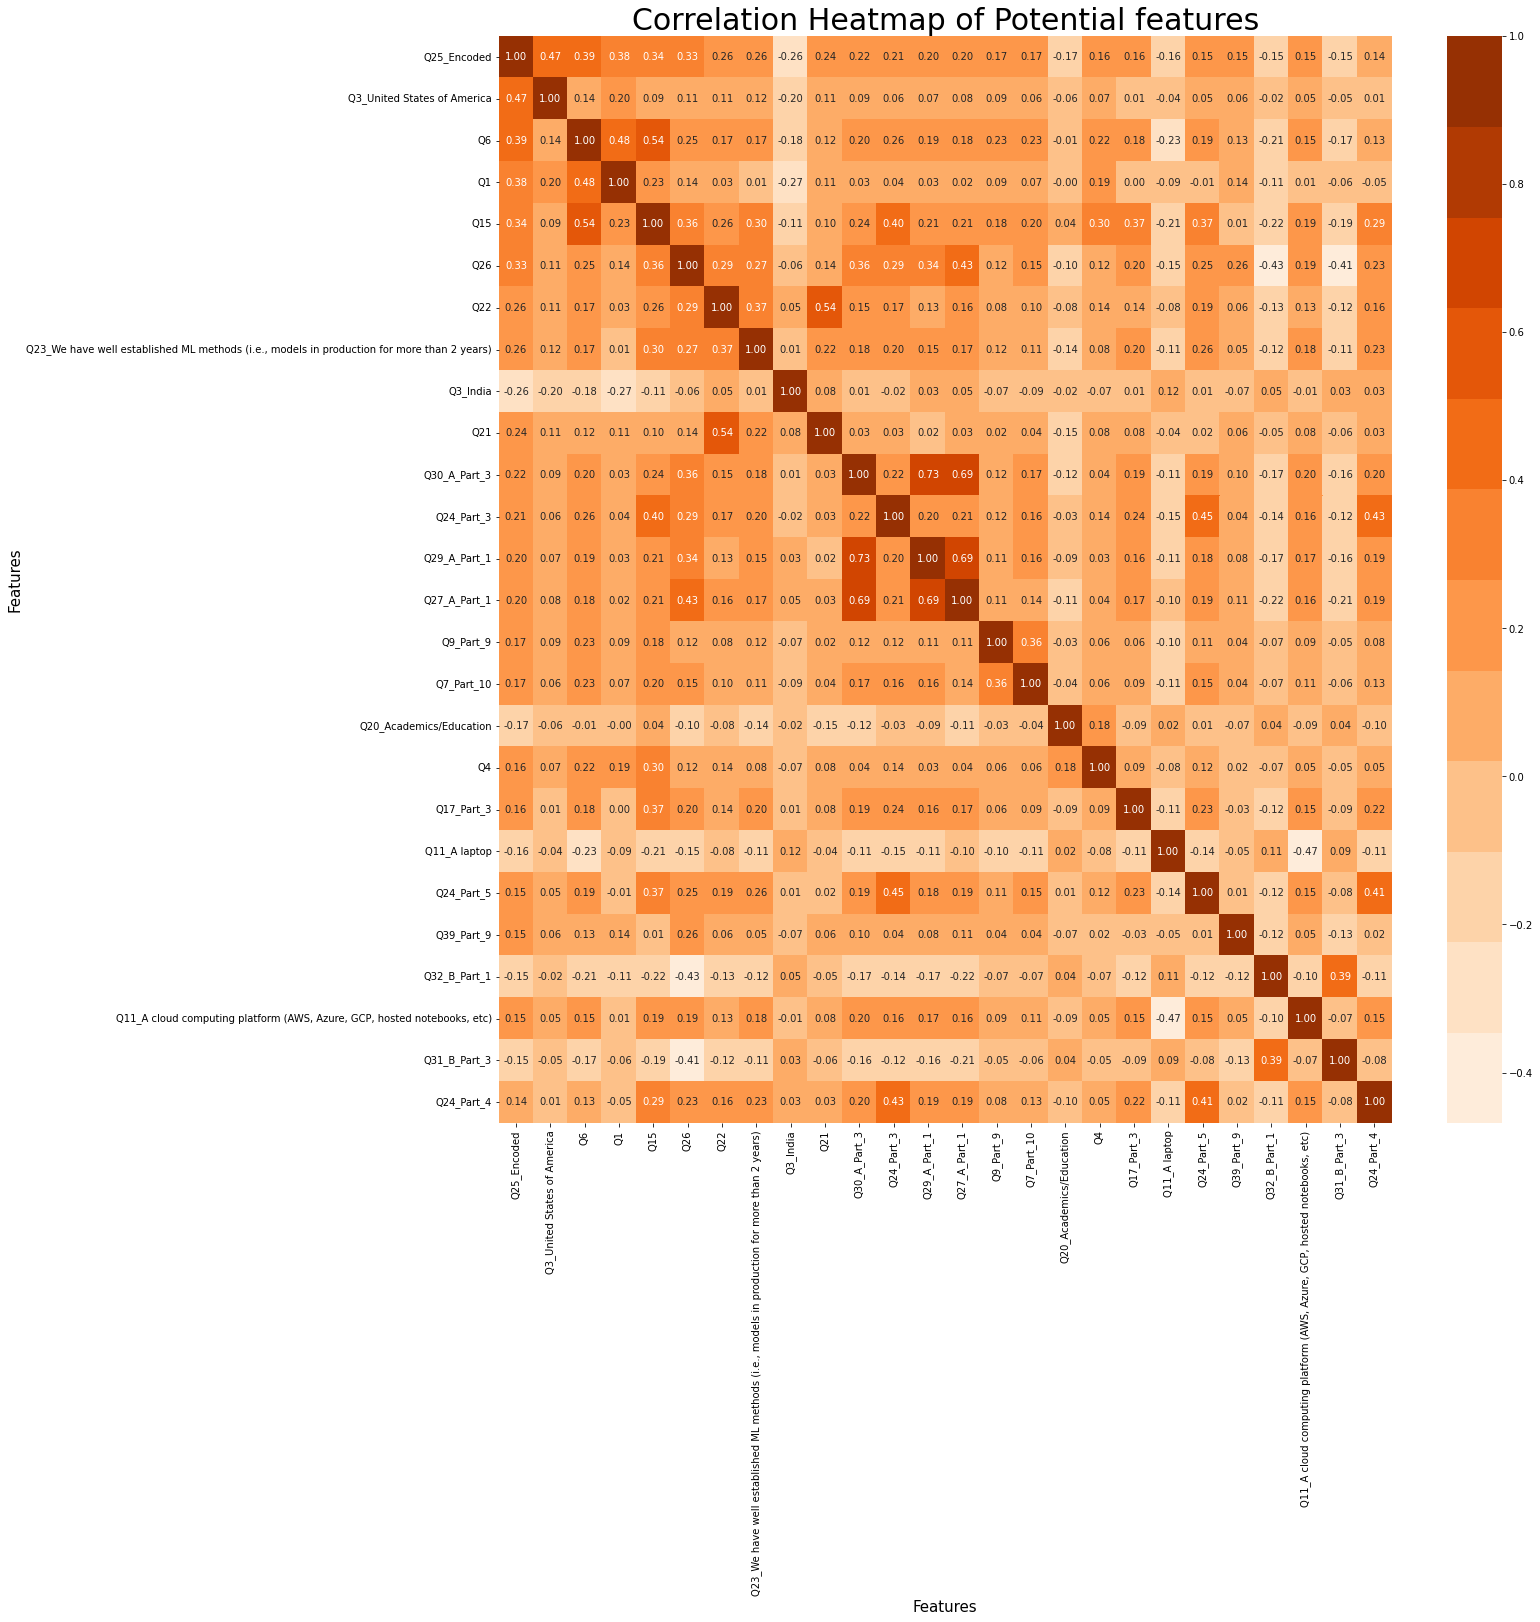

In [ ]:
cor_matrix = df_corr.corr()
cor_features = cor_matrix.index
plt.figure(figsize=(20,20))
cor_sal = abs(cor_matrix['Q25_Encoded']).sort_values(ascending = False)[0:26].index
#imp_features = cor_sal[cor_sal>0.15]
print('Correlation Matrix for features highly correlated to salary = ')#, len(imp_features))
g=sns.heatmap(df_corr[cor_sal].corr(),annot=True,
             fmt='.2f', cmap=sns.color_palette("Oranges",12))
g.set_title("Correlation Heatmap of Potential features", fontsize=30)
g.set_xlabel("Features",fontsize=15)
g.set_ylabel("Features",fontsize=15)

In [ ]:
print('Features correlated  = \n', cor_sal)

Features correlated  = 
 Index(['Q25_Encoded', 'Q3_United States of America', 'Q6', 'Q1', 'Q15', 'Q26',
       'Q22',
       'Q23_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q3_India', 'Q21', 'Q30_A_Part_3', 'Q24_Part_3', 'Q29_A_Part_1',
       'Q27_A_Part_1', 'Q9_Part_9', 'Q7_Part_10', 'Q20_Academics/Education',
       'Q4', 'Q17_Part_3', 'Q11_A laptop', 'Q24_Part_5', 'Q39_Part_9',
       'Q32_B_Part_1',
       'Q11_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
       'Q31_B_Part_3', 'Q24_Part_4'],
      dtype='object')


In [ ]:
# Instead of manually dropping features, we try to use some algorithm to do it
# L1 regression for feature selection
col_features = X_train_std.columns

# Initializing the Lasso variable and fitting it with out feature and target data. Choose a random value of alpha here for now
lasso_model = Lasso(alpha = 0.01, random_state=5).fit(X_train_std,y_train)

# Using .coef_ attribute to give a correlation between the features
model_coef = pd.Series(lasso_model.coef_, index = X_train_std.columns)
print (model_coef.head())

# Eliminate the features whose correlation value is 0 and keep the other features
print("\nLasso picked " + str(sum(model_coef != 0)) + " variables and eliminated the other " +  str(sum(model_coef == 0)) + " variables\n")

# Initializing SelectFromModel to easily select the features from our Lasso Model
rf_sfm = SelectFromModel(lasso_model)

# Training the selector on our feature and target data
rf_sfm.fit(X_train_std, y_train)

# Print the names of the most important features
for index_features in rf_sfm.get_support(indices=True):
    print(col_features[index_features])

# New feature data with selected features stored here
X_train_std=X_train_std[X_train_std.columns[(rf_sfm.get_support())]]

#X_test_std = X_test_std[X_train_std.columns[(rf_sfm.get_support())]]


Q7_Part_1   -0.004388
Q7_Part_2    0.000000
Q7_Part_3   -0.000000
Q7_Part_4    0.000000
Q7_Part_5   -0.000150
dtype: float64

Lasso picked 351 variables and eliminated the other 137 variables

Q7_Part_1
Q7_Part_5
Q7_Part_6
Q7_Part_7
Q7_Part_8
Q7_Part_9
Q7_Part_10
Q7_Part_11
Q7_Part_12
Q7_OTHER
Q9_Part_1
Q9_Part_2
Q9_Part_3
Q9_Part_6
Q9_Part_7
Q9_Part_8
Q9_Part_9
Q9_Part_12
Q9_OTHER
Q10_Part_1
Q10_Part_2
Q10_Part_3
Q10_Part_5
Q10_Part_8
Q10_Part_10
Q10_Part_13
Q10_Part_14
Q10_Part_15
Q10_Part_16
Q12_Part_1
Q12_Part_3
Q12_Part_4
Q12_Part_5
Q14_Part_2
Q14_Part_3
Q14_Part_5
Q14_Part_6
Q14_Part_8
Q14_Part_9
Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_Part_14
Q16_Part_15
Q16_Part_16
Q16_Part_17
Q16_OTHER
Q17_Part_2
Q17_Part_3
Q17_Part_4
Q17_Part_5
Q17_Part_7
Q17_Part_9
Q17_Part_10
Q17_Part_11
Q17_OTHER
Q18_Part_1
Q18_Part_3
Q18_Part_5
Q18_Part_6
Q18_OTHER
Q19_Part_1
Q19_Part_2
Q19_Part_4
Q19_OTHER


In [ ]:
X_train_std

,Q7_Part_1,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,...,Q20_Online Service/Internet-based Services,Q20_Retail/Sales,Q23_I do not know,Q23_No (we do not use ML methods),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)","Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)"
0,-2.080992,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,9.083591,-0.373359,...,-0.194837,5.457105,-0.443547,-0.506142,-0.444596,2.410339,-0.22269,1.447650,-0.263816,-0.235922
1,0.480540,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,-0.183247,-0.443547,-0.506142,2.249234,-0.414879,-0.22269,-0.690775,-0.263816,4.238697
2,0.480540,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,-0.183247,-0.443547,1.975729,-0.444596,-0.414879,-0.22269,-0.690775,-0.263816,-0.235922
3,-2.080992,-0.440246,2.278460,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,-0.183247,2.254552,-0.506142,-0.444596,-0.414879,-0.22269,-0.690775,-0.263816,-0.235922
4,0.480540,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,-0.183247,2.254552,-0.506142,-0.444596,-0.414879,-0.22269,-0.690775,3.790520,-0.235922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,0.480540,2.271458,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,-0.183247,-0.443547,-0.506142,-0.444596,2.410339,-0.22269,-0.690775,-0.263816,-0.235922
10769,0.480540,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,-0.183247,-0.443547,-0.506142,2.249234,-0.414879,-0.22269,1.447650,-0.263816,-0.235922
10770,0.480540,2.271458,2.278460,-0.455186,-0.113912,-0.105236,-0.35189,2.989681,-0.110089,-0.373359,...,-0.194837,-0.183247,-0.443547,-0.506142,-0.444596,-0.414879,-0.22269,-0.690775,-0.263816,-0.235922
10771,0.480540,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.35189,-0.334484,-0.110089,-0.373359,...,-0.194837,5.457105,-0.443547,-0.506142,2.249234,-0.414879,-0.22269,-0.690775,-0.263816,-0.235922


In [ ]:
X_test_std

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production),"Q41_Advanced statistical software (SPSS, SAS, etc.)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q41_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q41_Local development environments (RStudio, JupyterLab, etc.)",Q41_Other
0,-2.080992,-0.532513,1.076330,-0.388379,2.271458,-0.438893,2.196905,-0.113912,-0.105236,-0.351890,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,-0.931688,4.490549
1,0.480540,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.351890,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,1.447650,-0.263816,-0.235922,-0.931688,-0.222690
2,0.480540,-0.532513,1.076330,-0.388379,-0.440246,2.278460,2.196905,-0.113912,9.502453,-0.351890,...,-0.522449,-0.444596,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
3,0.480540,-0.532513,-0.929083,2.574802,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.351890,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
4,0.480540,-0.532513,-0.929083,-0.388379,2.271458,-0.438893,2.196905,-0.113912,-0.105236,-0.351890,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,0.480540,-0.532513,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,2.841799,...,-0.522449,2.249234,-0.414879,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,-0.931688,4.490549
4614,0.480540,1.877890,1.076330,-0.388379,-0.440246,-0.438893,2.196905,-0.113912,-0.105236,-0.351890,...,-0.522449,-0.444596,2.410339,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
4615,0.480540,-0.532513,-0.929083,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.351890,...,-0.522449,-0.444596,-0.414879,2.914040,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690
4616,0.480540,-0.532513,1.076330,-0.388379,-0.440246,-0.438893,-0.455186,-0.113912,-0.105236,-0.351890,...,-0.522449,-0.444596,2.410339,-0.343166,-0.22269,-0.690775,-0.263816,-0.235922,1.073321,-0.222690


In [ ]:

X_train_std.shape

(10773, 351)

In [ ]:
# We try to use the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sell=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1))

sell.fit(X_train_std,y_train)

sell.transform(X_train_std)

sell.get_support()

selected_feat = X_train_std.columns[(sell.get_support())]

print(selected_feat)

Index(['Q7_Part_1', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_OTHER', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3',
       ...
       'Q20_Academics/Education', 'Q20_Accounting/Finance',
       'Q20_Computers/Technology', 'Q20_Government/Public Service',
       'Q23_I do not know', 'Q23_No (we do not use ML methods)',
       'Q23_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q23_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'],
      dtype='object', length=125)


In [ ]:
#the feature came down to 190, so it looks like a good model but we need to verify this
selected_feat.shape

(125,)

In [ ]:
#we plot a correlation plot of the selected features and see more of the yellow colour so its a good sign

X_train_rf = X_train_std.loc[:,selected_feat]
X_train_nonstd_rf = X_train.loc[:,selected_feat]


In [ ]:

X_train_rf

,Q7_Part_1,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_10,Q7_Part_11,Q7_OTHER,Q9_Part_1,Q9_Part_2,Q9_Part_3,...,Q20_Academics/Education,Q20_Accounting/Finance,Q20_Computers/Technology,Q20_Government/Public Service,Q23_I do not know,Q23_No (we do not use ML methods),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)","Q41_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q41_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)"
0,-2.080992,-0.440246,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,-0.543701,-0.502522,-0.429076,...,-0.494104,-0.314562,-0.574742,-0.218525,-0.443547,-0.506142,-0.444596,2.410339,1.447650,-0.263816
1,0.480540,-0.440246,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,-0.543701,-0.502522,-0.429076,...,-0.494104,-0.314562,-0.574742,-0.218525,-0.443547,-0.506142,2.249234,-0.414879,-0.690775,-0.263816
2,0.480540,-0.440246,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,-0.543701,-0.502522,-0.429076,...,-0.494104,-0.314562,1.739911,-0.218525,-0.443547,1.975729,-0.444596,-0.414879,-0.690775,-0.263816
3,-2.080992,-0.440246,2.278460,-0.455186,-0.35189,-0.334484,-0.373359,1.839248,-0.502522,-0.429076,...,-0.494104,-0.314562,1.739911,-0.218525,2.254552,-0.506142,-0.444596,-0.414879,-0.690775,-0.263816
4,0.480540,-0.440246,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,-0.543701,1.989961,-0.429076,...,2.023864,-0.314562,-0.574742,-0.218525,2.254552,-0.506142,-0.444596,-0.414879,-0.690775,3.790520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,0.480540,2.271458,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,-0.543701,-0.502522,2.330588,...,-0.494104,-0.314562,1.739911,-0.218525,-0.443547,-0.506142,-0.444596,2.410339,-0.690775,-0.263816
10769,0.480540,-0.440246,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,1.839248,-0.502522,-0.429076,...,-0.494104,-0.314562,-0.574742,-0.218525,-0.443547,-0.506142,2.249234,-0.414879,1.447650,-0.263816
10770,0.480540,2.271458,2.278460,-0.455186,-0.35189,2.989681,-0.373359,-0.543701,-0.502522,-0.429076,...,-0.494104,-0.314562,1.739911,-0.218525,-0.443547,-0.506142,-0.444596,-0.414879,-0.690775,-0.263816
10771,0.480540,-0.440246,-0.438893,-0.455186,-0.35189,-0.334484,-0.373359,-0.543701,-0.502522,-0.429076,...,-0.494104,-0.314562,-0.574742,-0.218525,-0.443547,-0.506142,2.249234,-0.414879,-0.690775,-0.263816


In [ ]:
#making a new test set with new features
X_test_rf = X_test_std.loc[:,selected_feat]
X_test_nonstd_rf = X_test.loc[:,selected_feat]
X_test_rf.shape

(4618, 125)

# **Part 3**
# **Model implementation**

In [ ]:
y_train.unique()

array([10,  0,  1,  5,  2,  3,  4,  8,  6,  9,  7, 11, 13, 12, 14])

In [ ]:
ly = sorted(y_train.unique())
ly

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
ytr = pd.DataFrame()
ytr['train'] = y_train.copy()
ytr

,train
886,10
9345,0
13433,0
13708,1
12681,0
...,...
13124,1
3265,1
9846,0
10800,0


In [ ]:
for i in range(1,15):

  a = ly[0:i]

  b = ly[i:]

  ytr[str(i-1)] = ytr['train'].replace(a, 0)

  ytr[str(i-1)] = ytr[str(i-1)].replace(b, 1)


In [ ]:
ytr

,train,0,1,2,3,4,5,6,7,8,9,10,11,12,13
886,10,1,1,1,1,1,1,1,1,1,1,0,0,0,0
9345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13708,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3265,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def ordinal_reg(hyperparameter,solver, kfold_no ,X_train , y_train):



  model = LogisticRegression(C = hyperparameter, solver = solver)

  kfold = StratifiedKFold(n_splits=kfold_no)

  kfold.get_n_splits(X_train)
  accuracy = np.zeros(10)

  accuracy_train, accuracy_val, F1_val, recall_val, precision_val = [],[],[],[],[]

  for train_idx, val_idx in kfold.split(X_train,y_train):

      X_train_f, X_val_f = X_train.values[train_idx], X_train.values[val_idx]

      y_train_f, y_val_f = y_train.values[train_idx], y_train.values[val_idx]

      y_train_f1 = {}

      y_val_f1 = {}

      for i in range(0,14):

        y_train_f1[i+1] = ytr[str(i)].values[train_idx]

        y_val_f1[i+1] = ytr[str(i)].values[val_idx]

      

      train_pred = {}

      val_pred = {}

      traindf = pd.DataFrame()

      valdf = pd.DataFrame()

      for j in range(0,14):

        y_t = y_train_f1[j+1]

        model.fit(X_train_f, y_t) 

        traindf[str(j+1)] = (model.predict_proba(X_train_f))[:,0]

        valdf[str(j+1)] = (model.predict_proba(X_val_f))[:,0]
      
      

      traindf['15'] = 1-traindf['14']
      
      valdf['15'] = 1-valdf['14']

      for k in [14,13,12,11,10,9,8,7,6,5,4,3,2]:

        traindf[str(k)] = traindf[str(k)] - traindf[str(k-1)]

        valdf[str(k)] = valdf[str(k)] - valdf[str(k-1)]  
      
      
      traindf.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
      valdf.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
      
      traindf = traindf.mask(traindf<0, 0)
      traindf = traindf.div(traindf.sum(axis=1), axis=0)   # normalising train

      valdf = valdf.mask(valdf<0, 0)
      valdf = valdf.div(valdf.sum(axis=1), axis=0)         # normalising val

      prediction_train = traindf.idxmax(axis = 1).values
      prediction_train = prediction_train.astype(str).astype(int)
      
    
      

      acct = accuracy_score(y_train_f, prediction_train)


      prediction_val = valdf.idxmax(axis = 1).values   
      prediction_val = prediction_val.astype(str).astype(int)

      random.seed(13)
      rand_sample = random.randint(0,valdf.shape[0])
      prob_of_belonging_to_each_class_for_a_random_sample = valdf.iloc[rand_sample,:]
      
      

      accv = accuracy_score(y_val_f, prediction_val)
      
      precision = precision_score(y_val_f,prediction_val, average = 'weighted')
      recall = recall_score(y_val_f,prediction_val, average = 'weighted')
      f1 = f1_score(y_val_f,prediction_val, average = 'weighted')
      
      accuracy_train.append(acct)
      accuracy_val.append(accv)
      precision_val.append(precision)
      recall_val.append(recall)
      F1_val.append(f1)
  return accuracy_train, accuracy_val, precision_val ,F1_val, prob_of_belonging_to_each_class_for_a_random_sample

In [ ]:
list_of_mean_acc_train, list_of_mean_acc_val, list_of_variance_val, list_of_bias,list_of_error= [],[],[],[],[]

for i in [0.001,0.005,0.01,0.04,0.06,0.08,0.1,1]:
  a1,b1,c1,d1,p = ordinal_reg(i, 'lbfgs' ,10 ,X_train_rf , y_train)    
  list_of_mean_acc_train.append(np.mean(a1))
  list_of_mean_acc_val.append(np.mean(b1))
  list_of_variance_val.append(np.var(b1))
  list_of_bias.append(1-np.mean(b1)-np.var(b1))
  list_of_error.append(1-np.mean(b1))


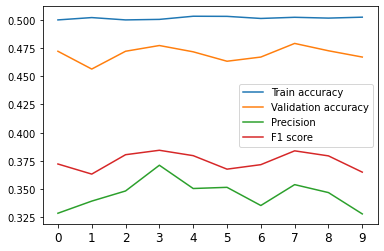

In [ ]:
#plotting to compare accuracies across folds

plt.plot(a1, label = "Train accuracy")
plt.plot(b1, label = "Validation accuracy")
plt.plot(c1, label = "Precision")
plt.plot(d1, label= "F1 score")
plt.xticks(np.arange(0,10,1), rotation=0, fontsize=12)
plt.legend()
plt.show()
#
#plt.xlabel('Salary Classes', fontsize=15)
#plt.ylabel('Probability', fontsize=15)
#plt.title('Probability Distribution of a random samples from prediciton set')

In [ ]:
print("Average and Variance of accuracy across folds:",np.mean(b1),np.var(b1))

Average and Variance of accuracy across folds: 0.4698792254303596 4.015172079430496e-05


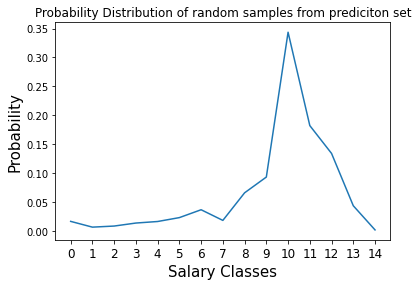

In [ ]:
#plotting probability of belonging to each class for a random value
plt.plot(p)
plt.xticks(np.arange(0,15,1), rotation=0, fontsize=12)
plt.xlabel('Salary Classes', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Probability Distribution of random samples from prediciton set')
plt.show()

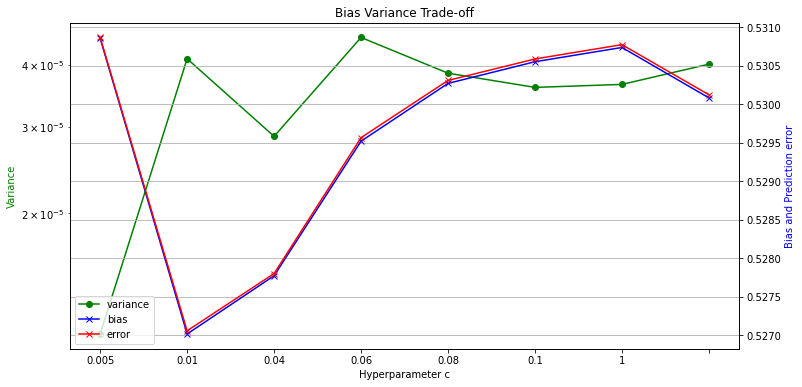

In [ ]:
fig,ax1 = plt.subplots(figsize=(12,6));
pl = [0.001,0.005,0.01,0.04,0.06,0.08,0.1,1]
ax1.plot(list_of_variance_val,color = 'g', marker = 'o',label = 'variance')
ax1.set_xlabel('Hyperparameter c')
ax1.set_yscale('log')
ax2 = ax1.twinx()

ax2.plot(list_of_bias,color='b',marker = 'x',label = 'bias')
ax2.plot(list_of_error,color='r', marker='x', label = 'error')

handles1,labels1 = ax1.get_legend_handles_labels()
handles2,labels2 = ax2.get_legend_handles_labels()


ax1.set_ylabel('Variance',color='g')
ax2.set_ylabel('Bias and Prediction error',color='b')
plt.legend(handles1+handles2,labels1+labels2, loc='best')
ax1.set_xticklabels(labels = pl)
plt.title('Bias Variance Trade-off')
plt.grid(axis='both')
plt.show()



# **Part 4**
# **Model tuning**

In [ ]:
#hyperparameter tuning with grid search


best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.006,0.007,0.008,0.009,0.0095,0.01]:

    for solver in ['newton-cg','lbfgs','liblinear','sag','saga']:

      train_accuracy , val_accuracy, precision, F1_validation, prob = ordinal_reg(C, solver, 10 ,X_train_rf , y_train)

      if np.mean(F1_validation) > best_accuracy:

        best_params = {'C':C, 'solver':solver}

        best_accuracy = np.mean(F1_validation)

        best_std = np.std(F1_validation)



print (best_params)

print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      



print ("\nThe optimal log model uses C={}, and a {} solver, and has a accuracy of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))


{'C': 0.01, 'solver': 'sag'}
Best Score: 0.367%(0.005%)

The optimal log model uses C=0.01, and a sag solver, and has a accuracy of 0.367% with a standard deviation of 0.005%


In [ ]:
# part4 Feature importance graph
def ordinal_reg_final(hyperparameter,solver,X_train , y_train, ytr):



      model = LogisticRegression(C = hyperparameter, solver = solver)

      accuracy = np.zeros(10)

      #accuracy_train, accuracy_val, F1_val, recall_val, precision_val = [],[],[],[],[]

      y_train_f1 = {}


      for i in range(0,14):

        y_train_f1[i+1] = ytr[str(i)]#.values[train_idx]
      

      train_pred = {}


      traindf = pd.DataFrame()


      for j in range(0,14):

        y_t = y_train_f1[j+1]

        model.fit(X_train, y_t) 

        traindf[str(j+1)] = (model.predict_proba(X_train))[:,0]
      
      

      traindf['15'] = 1-traindf['14']
      

      for k in [14,13,12,11,10,9,8,7,6,5,4,3,2]:

        traindf[str(k)] = traindf[str(k)] - traindf[str(k-1)]
 
      
      
      traindf.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']

      traindf = traindf.mask(traindf<0, 0)
      traindf = traindf.div(traindf.sum(axis=1), axis=0)   # normalising train

      prediction_train = traindf.idxmax(axis = 1).values
      prediction_train = prediction_train.astype(str).astype(int)
      
      acct = accuracy_score(y_train, prediction_train)
      y_pred = pd.DataFrame(prediction_train, columns = ['Q25_prediction'])
      data_for_corr = pd.concat([X_train,y_pred],axis = 1)
      
      
      precision = precision_score(y_train,prediction_train, average = 'weighted')
      recall = recall_score(y_train,prediction_train, average = 'weighted')
      f1 = f1_score(y_train,prediction_train, average = 'weighted')
      
      ''' accuracy_train.append(acct)
      precision_val.append(precision)
      recall_val.append(recall)
      F1_val.append(f1)'''
      
     
      return acct, precision ,f1,data_for_corr, prediction_train

In [ ]:
train_accuracy , precision, F1 , corr, prediction = ordinal_reg_final(0.01, 'sag', X_train_rf , y_train, ytr)

In [ ]:
#Training F1 score
print("F1 score for tuned hyperparameters =",F1)
print("Training accuracy for tuned hyperparameters =",train_accuracy)

F1 score for tuned hyperparameters = 0.3968229262636839
Training accuracy for tuned hyperparameters = 0.49707602339181284


Text(158.09374999999997, 0.5, 'Features')

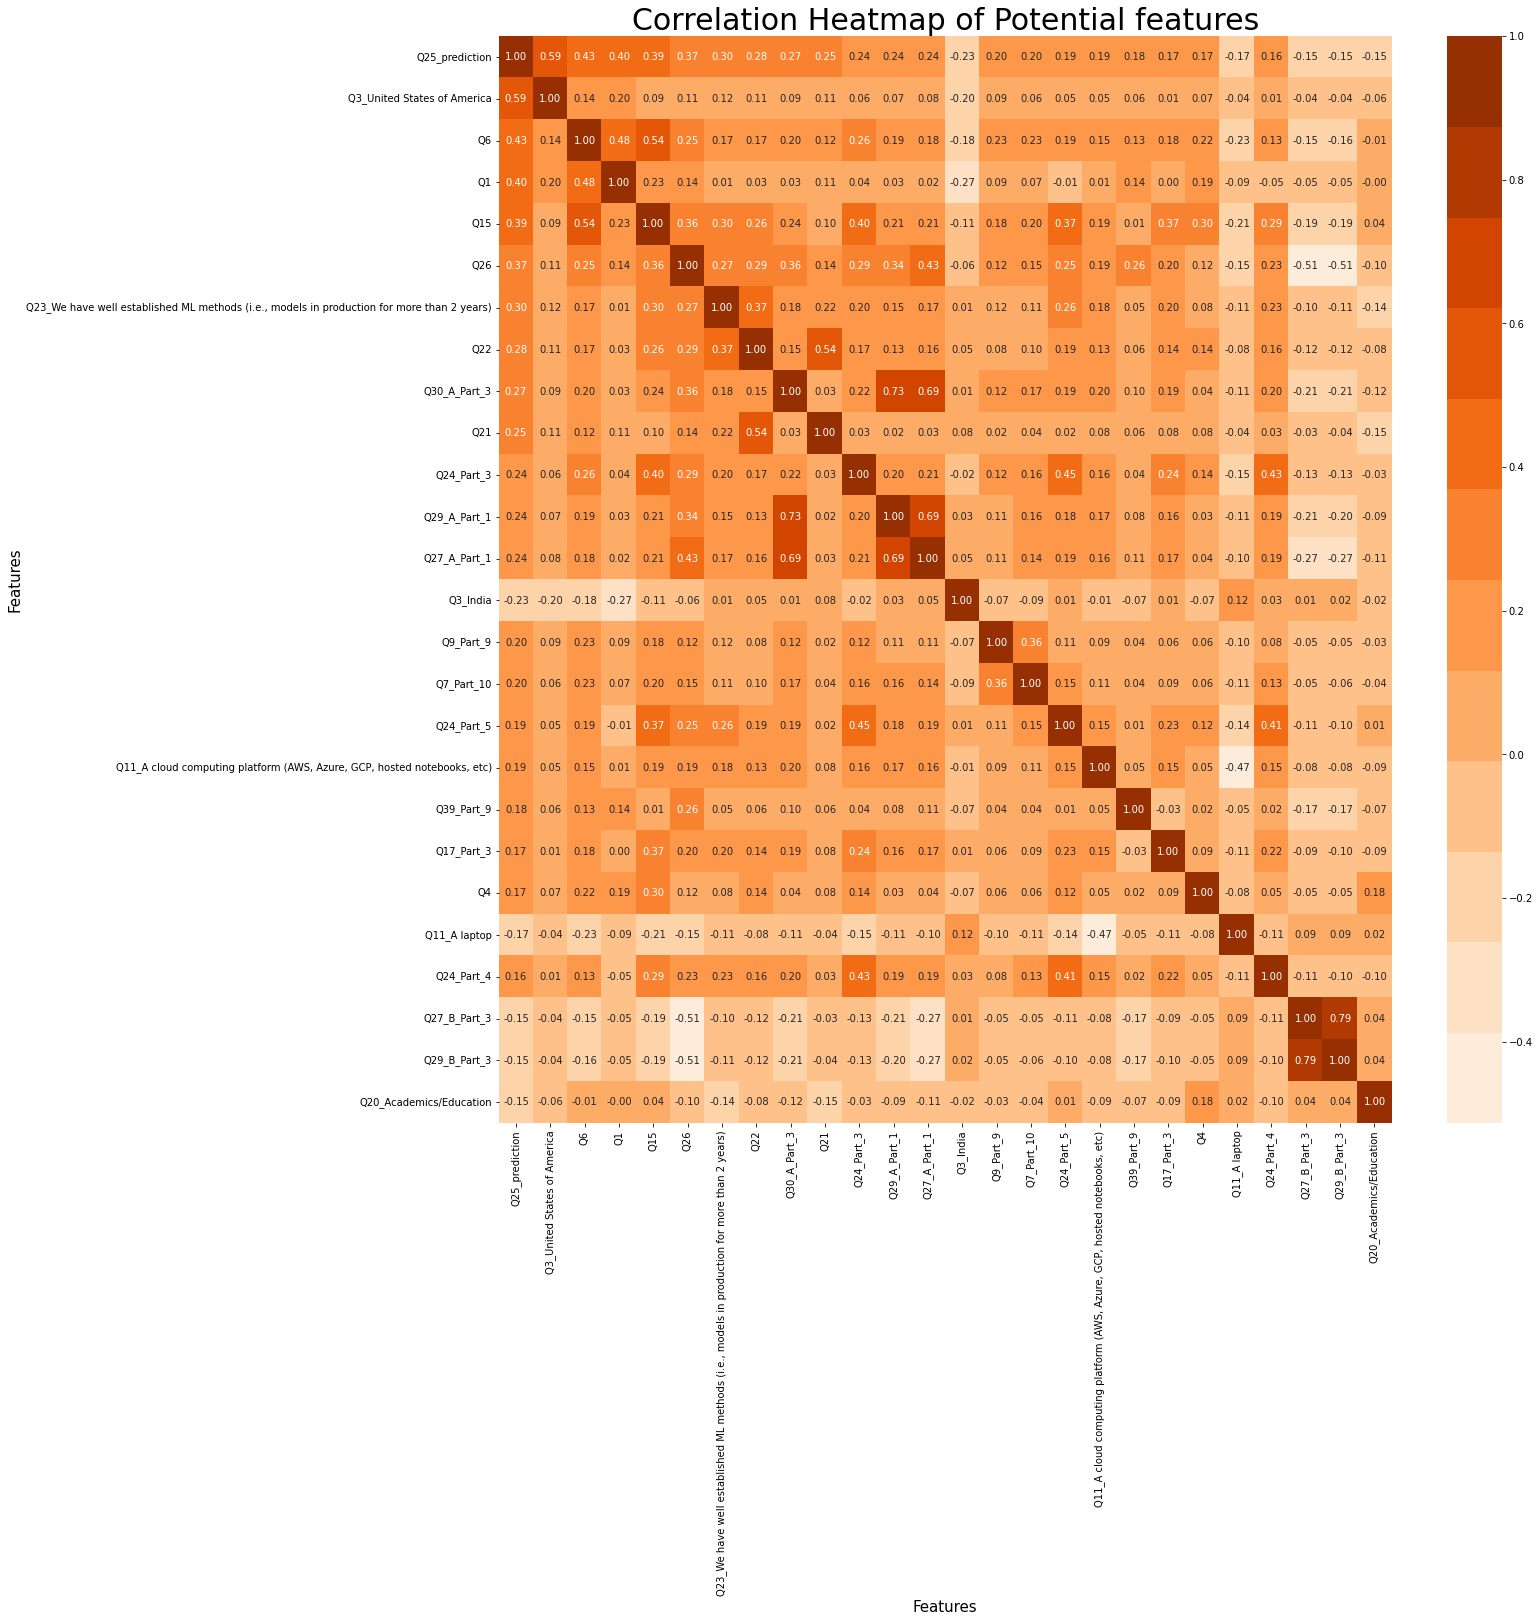

In [ ]:
#Feature importance for part 4
corr_matrix = corr.corr()
plt.figure(figsize=(20,20))
best_features_corr_plot = abs(corr_matrix['Q25_prediction']).sort_values(ascending = False)[0:26].index
g=sns.heatmap(corr[best_features_corr_plot].corr(),annot=True,
             fmt='.2f', cmap=sns.color_palette("Oranges",12))
g.set_title("Correlation Heatmap of Potential features", fontsize=30)
g.set_xlabel("Features",fontsize=15)
g.set_ylabel("Features",fontsize=15)


# **Part 5**
# **Testing & Discussion**

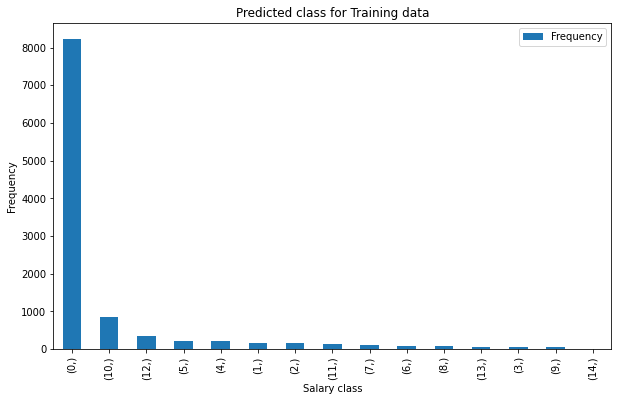

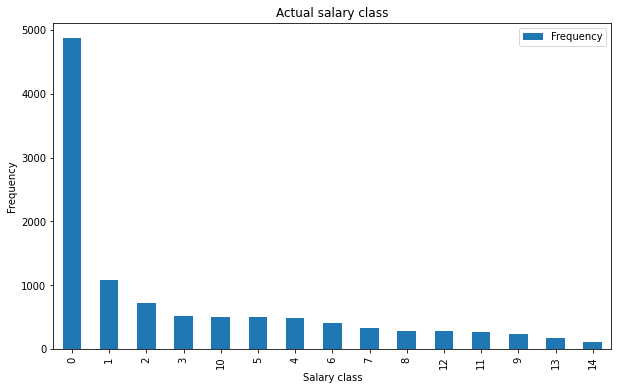

In [ ]:
# Part 5 frequency of prediction
prediction_train = pd.DataFrame(prediction)
plt.figure(figsize = (10,6))
prediction_train.value_counts().plot(kind = 'bar', label = "Frequency")
plt.xlabel('Salary class')
plt.ylabel('Frequency')
plt.title('Predicted class for Training data')
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
y_train.value_counts().plot(kind = 'bar', label = "Frequency")
plt.xlabel('Salary class')
plt.ylabel('Frequency')
plt.title('Actual salary class')
plt.legend()
plt.show()

In [ ]:
ytt = pd.DataFrame()
ytt['test'] = y_test.copy()
ytt

,test
14827,0
2626,1
2474,0
12086,2
4195,7
...,...
5856,3
5194,6
5578,0
2641,0


In [ ]:
for i in range(1,15):

  a = ly[0:i]

  b = ly[i:]

  ytt[str(i-1)] = ytt['test'].replace(a, 0)

  ytt[str(i-1)] = ytt[str(i-1)].replace(b, 1)

In [ ]:
ytt

,test,0,1,2,3,4,5,6,7,8,9,10,11,12,13
14827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2626,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12086,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4195,7,1,1,1,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5194,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0
5578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_accuracy , precision_test, F1_test , corr_test, prediction_test = ordinal_reg_final(0.01, 'sag', X_test_rf , y_test, ytt)

In [ ]:
print("F1 score for tuned hyperparameters =",F1_test)
print("Test accuracy for tuned hyperparameters =",test_accuracy)

F1 score for tuned hyperparameters = 0.41821003791623473
Test accuracy for tuned hyperparameters = 0.5142919012559549


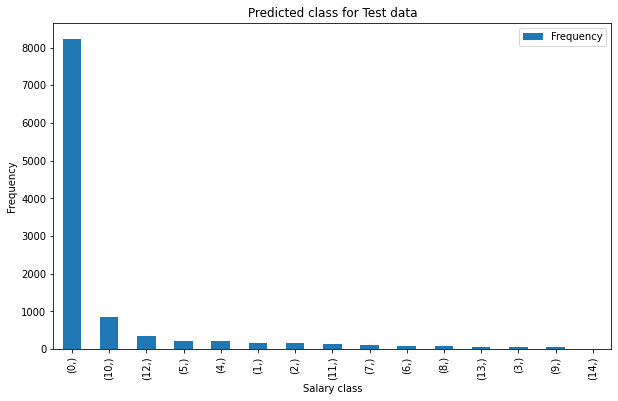

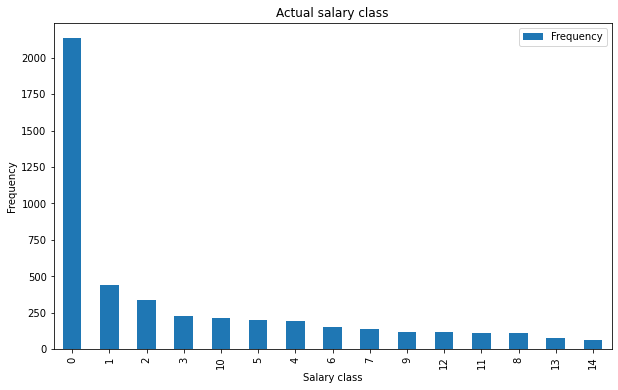

In [ ]:
prediction_test = pd.DataFrame(prediction)
plt.figure(figsize = (10,6))
prediction_test.value_counts().plot(kind = 'bar', label = "Frequency")
plt.xlabel('Salary class')
plt.ylabel('Frequency')
plt.title('Predicted class for Test data')
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
y_test.value_counts().plot(kind = 'bar', label = "Frequency")
plt.xlabel('Salary class')
plt.ylabel('Frequency')
plt.title('Actual salary class')
plt.legend()
plt.show()